# Dietary Pattern Recognition and Obesity Level Prediction

Dataset from UCI : **"Estimation of Obesity Levels Based on Eating Habits and Physical Condition"** 

Source: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

---

### Description of the dataset, as available on UCI, is as follows.

1. **Gender**: Female/Male
2. **Age**: How old are you?
3. **Height**: How tall are you?
4. **Weight**: How heavy are you? 
5. **family_history_with_overweight**: Has a family member suffer/suffered from overweight?
6. **FAVC**: Do you eat high caloric food frequently?
7. **FCVC**: Do you usually eat vegetables in your meals?
8. **NCP**: How many main meals do you have daily?
9. **CAEC**: Do you eat any food between meals?
10. **SMOKE**: Do you smoke?
11. **CH2O**: How much water do you drink daily?
12. **SCC**: Do you monitor the calories you eat daily?
13. **FAF**: How often do you have physical activity?
14. **TUE**:How much time do you use technological devices such as cell phone, videogames, television, computer and others?
15. **CALC**: How often do you drink alcohol?
16. **MTRANS**: Which transportation do you usually use?
17. **NObeyesdad**: Obesity Level 

### Relevant Features
Main focus - **NObeyesdad**: Obesity Level 

1. **FAVC**: Do you eat high caloric food frequently?
2. **FCVC**: Do you usually eat vegetables in your meals?
3. **NCP**: How many main meals do you have daily?
4. **CAEC**: Do you eat any food between meals?
5. **CH2O**: How much water do you drink daily?
6. **SCC**: Do you monitor the calories you eat daily?
7. **CALC**: How often do you drink alcohol?

---

## Data Preprocessing

In [23]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Loading and Initial Exploration

Data is loaded from a CSV file and intial checks for missing values were performed. 

In [24]:
obesity = pd.read_csv('C:/Users/yong hao/Downloads/ObesityData.csv')
obesity.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [25]:
print("Data type : ", type(obesity))
print("Data dims : ", obesity.shape)

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dims :  (2111, 17)


In [26]:
print(obesity.dtypes)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


In [27]:
# Check for missing values
print(obesity.isnull().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [28]:
print("Data dims : ", obesity.shape)
obesity.describe()

Data dims :  (2111, 17)


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### Data Cleaning

Rounded off numerical features for simplicity and transformed categorical variables for model compatibility.

In [29]:
# Round numerical variables to whole numbers
obesity['Age'] = obesity['Age'].round().astype(int)
obesity['Height'] = obesity['Height'].round(2)
obesity['Weight'] = obesity['Weight'].round().astype(int)
obesity['FCVC'] = obesity['FCVC'].round().astype(int)
obesity['NCP'] = obesity['NCP'].round().astype(int)
obesity['CH2O'] = obesity['CH2O'].round().astype(int)
obesity['FAF'] = obesity['FAF'].round().astype(int)
obesity['TUE'] = obesity['TUE'].round().astype(int)

---
## Exploratory Data Analysis (EDA)

### Descriptive Statistics
Provided insights into central tendency and variability of the features.

In [32]:
obesity.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586452,2.423496,2.687826,2.014685,1.006632,0.664614
std,6.357078,0.093368,26.190136,0.583905,0.809680,0.688616,0.895462,0.674009
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.500000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,23.000000,1.700000,83.000000,2.000000,3.000000,2.000000,1.000000,1.000000
75%,26.000000,1.770000,107.000000,3.000000,3.000000,2.000000,2.000000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


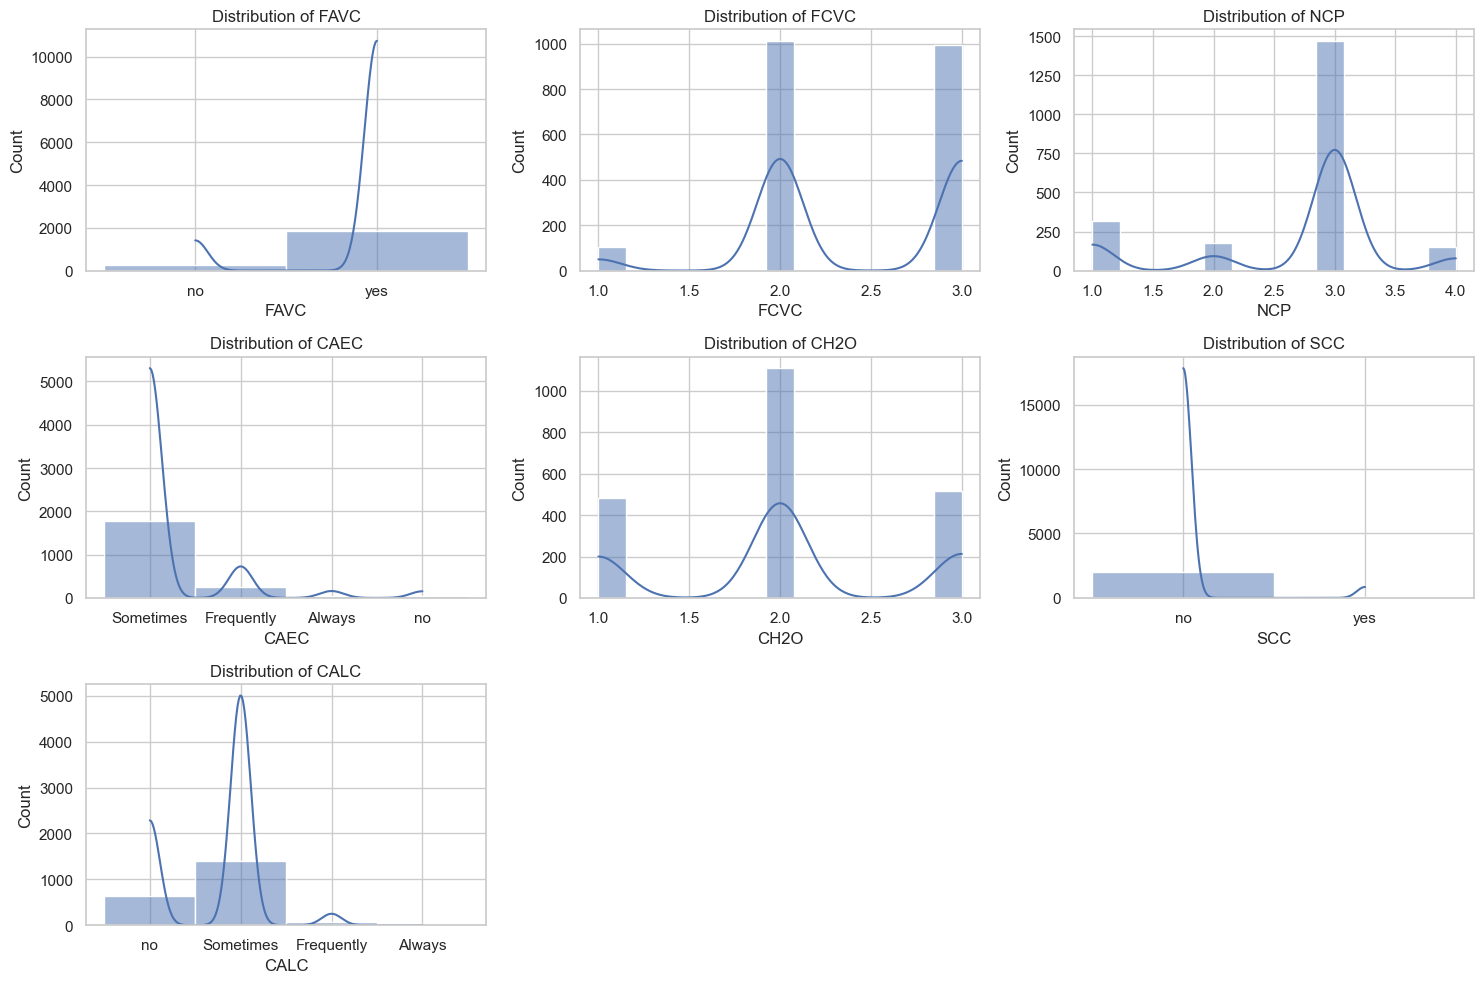

In [99]:
# Define features for clustering
consumeHabits = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'CALC']

# Set up the style of the plots
sb.set(style="whitegrid")

# Plot distributions of each variable
plt.figure(figsize=(15, 10))
for i, col in enumerate(consumeHabits, start=1):
    plt.subplot(3, 3, i)
    sb.histplot(data=obesity, x=col, kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

### Categorization of Obesity Levels for Simplified Analysis

For a simplified analysis and enhance the interpretability of our model, we decided to group the various specific obesity levels into broader categories. Originally, the dataset includes detailed classifications such as "Insufficient Weight," "Normal Weight," "Overweight Level I/II," and different types of obesity. While this granularity is valuable for specific medical or health evaluations, it can be overly complex for analyzing general patterns in consumption habits and their links to obesity.

In [49]:
# Map the 'NObeyesdad' classes to the new groupings
class_groups = {
    'Insufficient_Weight': 'Low/Normal weight',
    'Normal_Weight': 'Low/Normal weight',
    'Overweight_Level_I': 'Overweight',
    'Overweight_Level_II': 'Overweight',
    'Obesity_Type_I': 'Obese',
    'Obesity_Type_II': 'Obese',
    'Obesity_Type_III': 'Obese'
}

# Map the classes to the new groupings
obesity['NObeyesdad_Group'] = obesity['NObeyesdad'].map(class_groups)

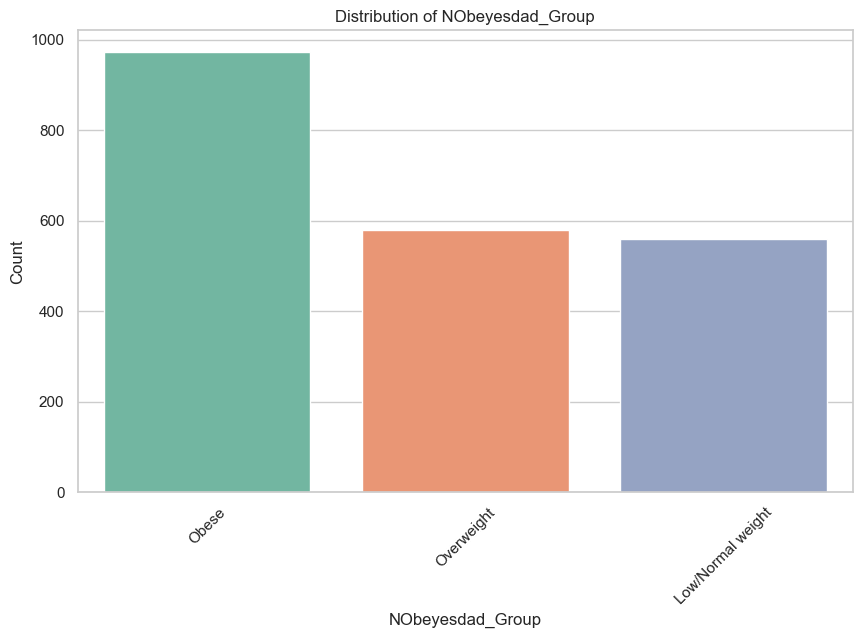

In [50]:
# Set the style of the seaborn plot
sb.set_style("whitegrid")

# Plot the distribution of 'NObeyesdad'
plt.figure(figsize=(10, 6))
sb.countplot(data=obesity, x='NObeyesdad_Group', order=obesity['NObeyesdad_Group'].value_counts().index, palette='Set2')
plt.title('Distribution of NObeyesdad_Group')
plt.xlabel('NObeyesdad_Group')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

### Visualisation 

Distribution of obesity levels visualized to understand data balance and skewness.

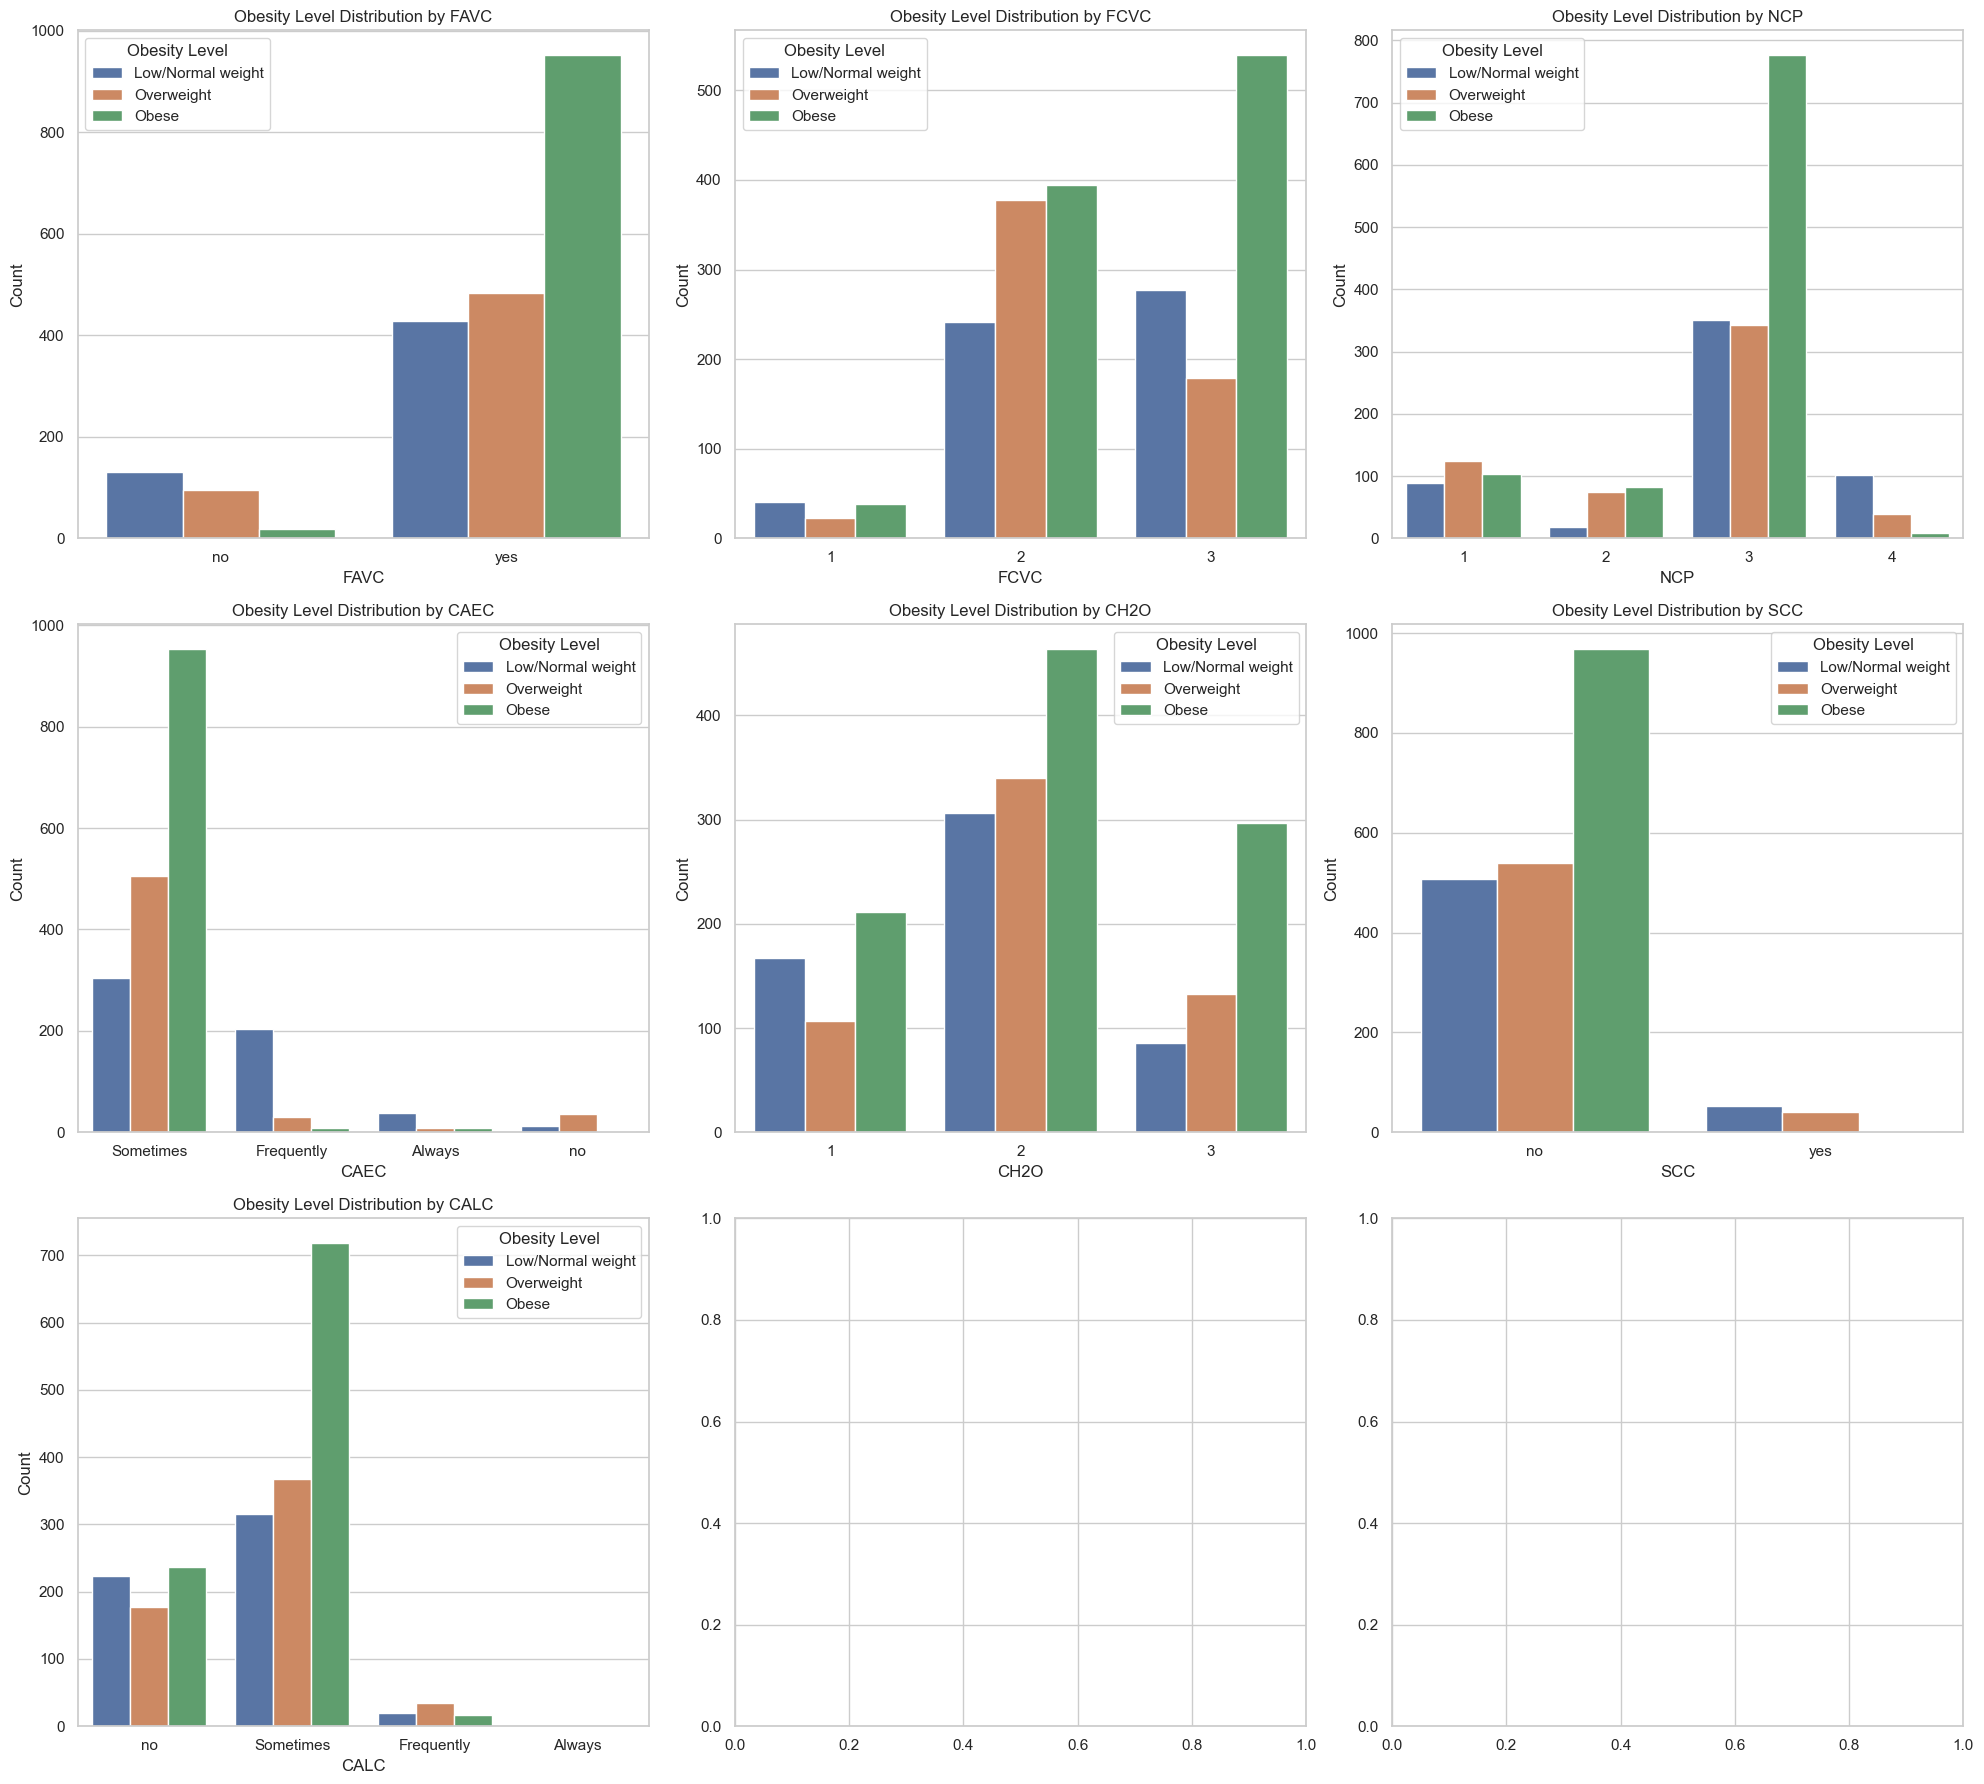

In [107]:
n_cols = 3
n_rows = (len(consumeHabits) + n_cols - 1) // n_cols

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, 6*n_rows))

for i, var in enumerate(consumeHabits):
    row = i // n_cols
    col = i % n_cols
    sb.countplot(data=obesity, x=var, hue='NObeyesdad_Group', ax=axes[row, col])
    axes[row, col].set_title(f'Obesity Level Distribution by {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Count')
    axes[row, col].legend(title='Obesity Level')

plt.tight_layout()
plt.show()

#### Insights from visualizations
Looking at:
1. FAVC (Do you eat high caloric food frequently?): The data indicates that individuals who frequently eat high caloric foods tend to have higher obesity levels.
2. FCVC (Do you usually eat vegetables in your meals?): Surprisingly, the graph suggests that an increased frequency of vegetable consumption is associated with higher obesity counts, which is contrary to typical health advice.
3. NCP (How many main meals do you have daily?): The graph shows that individuals who have more than three main meals a day tend to be more obese, which may suggest that eating frequency could be related to higher obesity levels.
4. CAEC (Do you eat any food between meals?): The distribution suggests that people who never eat between meals have lower obesity levels, whereas those who sometimes or frequently snack between meals show higher levels of obesity.
5. CH2O (How much water do you drink daily?): This graph presents a less clear relationship, but there is a peak in obesity counts at level 2, possibly indicating a moderate daily water intake.
6. SCC (Do you monitor the calories you eat daily?): The data shows that individuals who do not monitor their calorie intake have higher counts of obesity compared to those who do.
7. CALC (How often do you drink alcohol?): The graph indicates that individuals who never drink alcohol have a lower obesity count, whereas those who drink alcohol sometimes have higher counts of obesity, which could reflect lifestyle patterns that correlate with weight.


### Cramér's V

In [62]:
from scipy.stats import chi2_contingency

# Function to calculate Cramér's V
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Compute Cramér's V for each categorical variable
for var in consumeHabits:
    confusion_matrix = pd.crosstab(obesity['NObeyesdad_Group'], obesity[var])
    cramers_v_score = cramers_v(confusion_matrix)
    print(f'Cramér\'s V for {var}: {cramers_v_score:.2f}')

Cramér's V for FAVC: 0.29
Cramér's V for FCVC: 0.16
Cramér's V for NCP: 0.23
Cramér's V for CAEC: 0.38
Cramér's V for CH2O: 0.12
Cramér's V for SCC: 0.19
Cramér's V for CALC: 0.12


#### Insights from cramer's v
Looking at:
1. FAVC (Do you eat high caloric food frequently?): There's a moderate association between high caloric food and obesity.
2. FCVC (Do you usually eat vegetables in your meals?): There's a weak association between eating vegetables and obesity.
3. NCP (How many main meals do you have daily?): There's a weak association between how many meals you have and obesity.
4. CAEC (Do you eat any food between meals?): There's a moderate association between eating food between meals and obesity.
5. CH2O (How much water do you drink daily?): There's a weak association between the amount of water you drink and obesity.
6. SCC (Do you monitor the calories you eat daily?): There's a weak association between monitoring calories and obesity.
7. CALC (How often do you drink alcohol?): There's a weak association between drinking alcohol and obesity.

---
## Clustering for Dietary Pattern Identification

### Elbow Method for Optimal Clusters

Determined the number of clusters for K-means algorithm.

C:\Users\yong hao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yong hao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yong hao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yong hao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

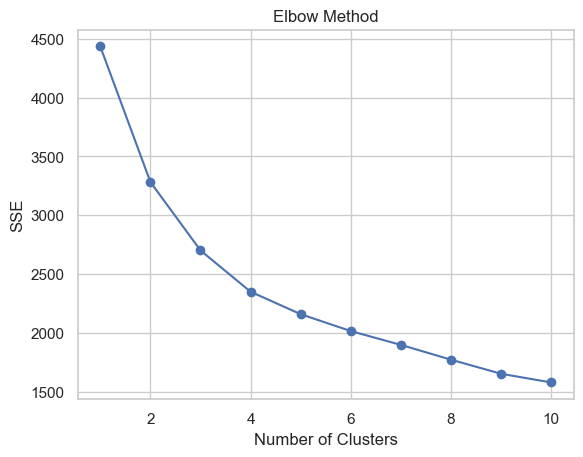

In [89]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables using label encoding
encoded_lifestyle_data = obesity.copy()  # Make a copy of the original dataframe
label_encoder = LabelEncoder()

for var in consumeHabits:
    encoded_lifestyle_data[var] = label_encoder.fit_transform(encoded_lifestyle_data[var])

# Define features for clustering
features_for_clustering = ['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'CALC']

# Perform Elbow Method to determine the optimal number of clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(encoded_lifestyle_data[features_for_clustering])
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

#### Interpretation from Elbow Method
The optimal number of clusters in an elbow method graph is typically where the rate of decrease sharply changes, resembling an "elbow." The elbow appears to be at the point where the number of clusters is 4, as the Sum of Squared Errors (SSE) starts to decrease at a slower rate beyond this point. This suggests that increasing the number of clusters beyond 4 does not provide a significant gain in the quality of clustering, thus 4 is the optimal number of clusters to use for this particular dataset.

### Implementation and Analysis of Clustering on Dietary Data

In [113]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Select the relevant columns for clustering
dietary_data = obesity[['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'CALC', 'NObeyesdad_Group']]

# Convert categorical variables to numerical using LabelEncoder
label_encoder = LabelEncoder()
dietary_data_encoded = dietary_data.apply(label_encoder.fit_transform)

# Standardize the data
scaler = StandardScaler()
dietary_data_scaled = scaler.fit_transform(dietary_data_encoded)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # You can adjust the number of clusters
kmeans.fit(dietary_data_scaled)
clusters = kmeans.predict(dietary_data_scaled)

# Add the cluster labels to the dataset
obesity['Cluster'] = clusters

# Analyze the relationship between clusters and obesity levels
cluster_obesity = obesity.groupby('Cluster')['NObeyesdad_Group'].value_counts(normalize=True).unstack()

# Reorder the columns in the DataFrame
cluster_obesity_reordered = cluster_obesity[['Low/Normal weight', 'Overweight', 'Obese']]

# Display the percentage breakdown with reordered columns
print("Percentage breakdown of each obesity level within each cluster:")
print(cluster_obesity_reordered)

C:\Users\yong hao\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Percentage breakdown of each obesity level within each cluster:
NObeyesdad_Group  Low/Normal weight  Overweight     Obese
Cluster                                                  
0                          0.885185    0.059259  0.055556
1                          0.201396    0.138584  0.660020
2                          0.088949    0.517520  0.393531
3                          0.541667    0.427083  0.031250


#### Breakdown of clusters
For the percentage breakdown of obesity levels within each cluster:

1. Cluster 0 has a high percentage of low/normal weight individuals and the lowest percentage of obese individuals.
2. Cluster 1 has the highest percentage of obese individuals and the lowest percentage of low/normal weight individuals.
3. Cluster 2 has moderate percentages across all obesity levels but has the highest percentage of overweight individuals.
4. Cluster 3 has moderate percentages of overweight & Low/Normal weight individuals and the lowest percentage of obessity individuals.


In [91]:
# Extract cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroid_df = pd.DataFrame(centroids, columns=dietary_data.columns)

# Print centroids
print("Average of each varibles for the different clusters:")
print(centroid_df)

Average of each varibles for the different clusters:
       FAVC      FCVC       NCP      CAEC      CH2O           SCC      CALC  \
0  0.692593  1.459259  1.796296  0.925926  0.755556 -1.595946e-16  2.388889   
1  0.960120  1.609172  2.008973  2.005982  1.182453 -1.040834e-16  2.008973   
2  0.886792  1.133423  1.221024  2.030997  0.882749 -2.775558e-17  2.576819   
3  0.604167  1.625000  1.635417  1.625000  1.010417  1.000000e+00  2.260417   

   NObeyesdad_Group  
0          0.174074  
1          0.937188  
2          1.428571  
3          0.885417  


#### Average of each variable for the different clusters
Looking at the average of each variable for the different clusters:

1. Cluster 0 tends to have the lowest frequency of high caloric food consumption (FAVC), higher vegetable consumption (FCVC), fewer main meals (NCP), less snacking (CAEC), a peculiarly low water intake (CH2O), no calorie counting (SCC), and a lower frequency of alcohol consumption (CALC).
2. Cluster 1 has a higher frequency of high caloric food consumption, the highest vegetable consumption, the highest number of main meals, frequent snacking, and a moderate amount of water intake, but they do not monitor their calorie intake and have a moderate frequency of alcohol consumption.
3. Cluster 2 has moderate levels of high caloric food consumption, lower vegetable consumption, moderate number of main meals, higher snacking frequency, higher water intake, and they do not tend to monitor calorie intake, with a higher frequency of alcohol consumption.
4. Cluster 3 has moderate high caloric food consumption, moderate vegetable consumption, a high number of main meals, high snacking frequency, lower water intake, they do monitor calorie intake, and have the highest frequency of alcohol consumption.

### Characterising Cluster

1. Cluster 0 has a high percentage of low/normal weight individuals and the lowest percentage of obese individuals, this cluster of individuals with these habits have a Low risk of obesity.
2. Cluster 1 has the highest percentage of obese individuals and the lowest percentage of low/normal weight individuals, this cluster of individuals with these habits have a High risk of obesity.
3. Cluster 2 has moderate percentages across all obesity levels but has the highest percentage of overweight individuals, this cluster of individuals with these habits have a Moderate to High Risk of obesity.
4. Cluster 3 has moderate percentages of overweight & Low/Normal weight individuals and the lowest percentage of obessity individuals, this cluster of individuals with these habits have a Moderate risk of obesity.

Naming and setting context for the cluster its variables.

In [92]:
# First, create a new column to store the textual risk group labels
obesity['Risk_Group_Label'] = obesity['Cluster'].map({
    0: 'Low Risk Group',
    1: 'High Risk Group',
    2: 'Moderate to High Risk Group',
    3: 'Moderate Risk Group'
})

# Then, rename the original 'Cluster' column to 'Risk_Group_ID'
obesity.rename(columns={'Cluster': 'Risk_Group_ID'}, inplace=True)

# Now your DataFrame has two columns: 'Risk_Group_ID' with the original numerical IDs
# and 'Risk_Group_Label' with the new textual labels.
print(obesity.head())

   Gender  Age  Height  Weight family_history_with_overweight FAVC  FCVC  NCP  \
0  Female   21    1.62      64                            yes   no     2    3   
1  Female   21    1.52      56                            yes   no     3    3   
2    Male   23    1.80      77                            yes   no     2    3   
3    Male   27    1.80      87                             no   no     3    3   
4    Male   22    1.78      90                             no   no     2    1   

        CAEC SMOKE  ...                 MTRANS           NObeyesdad  \
0  Sometimes    no  ...  Public_Transportation        Normal_Weight   
1  Sometimes   yes  ...  Public_Transportation        Normal_Weight   
2  Sometimes    no  ...  Public_Transportation        Normal_Weight   
3  Sometimes    no  ...                Walking   Overweight_Level_I   
4  Sometimes    no  ...  Public_Transportation  Overweight_Level_II   

    NObeyesdad_Group Risk_Group_ID             Risk_Group_Label CALC_encoded  \
0  Low

### Correlation of Cluster with Obesity Levels 

In [93]:
from scipy.stats import chi2_contingency
import numpy as np

# Create a contingency table
contingency_table = pd.crosstab(obesity['Risk_Group_Label'], obesity['NObeyesdad_Group'])

# Calculate Cramér's V
cramers_v_value = cramers_v(contingency_table)
print(f"Cramér's V between Risk_Group and NObeyesdad_Group is: {cramers_v_value:.3f}")


Cramér's V between Risk_Group and NObeyesdad_Group is: 0.493


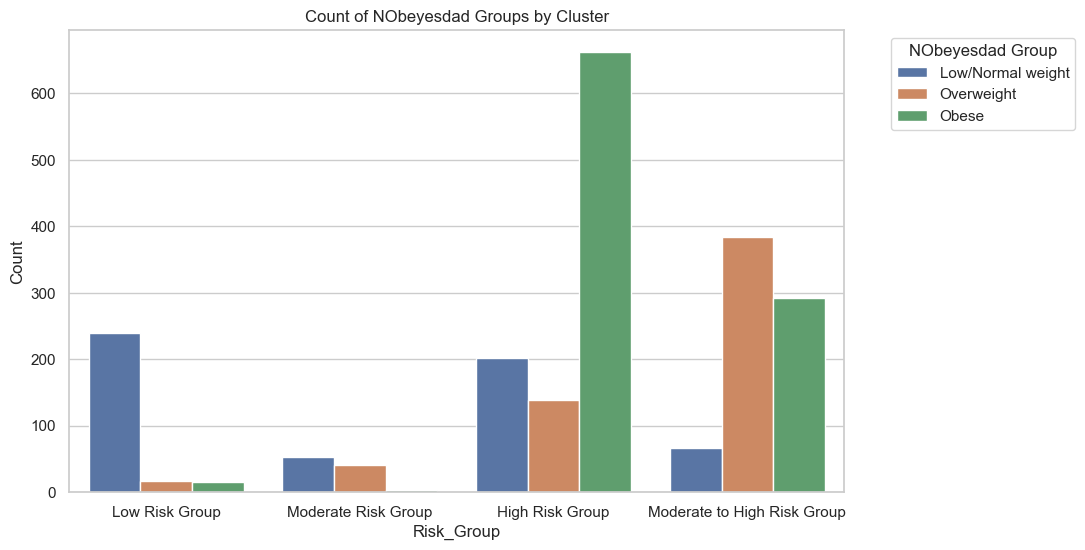

In [119]:
# Set the aesthetic style of the plots
sb.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(10, 6))
ax = sb.countplot(data=obesity, x='Risk_Group_Label', hue='NObeyesdad_Group')

# Add title and labels
plt.title('Count of NObeyesdad Groups by Cluster')
plt.xlabel('Risk_Group')
plt.ylabel('Count')

# Move the legend to an appropriate position
plt.legend(title='NObeyesdad Group', bbox_to_anchor=(1.05, 1), loc=2)

# Show the plot
plt.show()

**There's a High association between the established risk groups and obesity levels.**

A visualization of the count of NObeyesdad Groups by Cluster can help us to understand the distribution of the NObeyesdad Groups within each cluster.

---
## Predictive Modeling for Obesity Level

### Classification Model Training 
Trained a logistic regression model using the clusters and additional features.

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Feature Engineering: Use the cluster labels as features
X = obesity[['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O', 'SCC', 'CALC', 'Risk_Group_ID']]
y = obesity['NObeyesdad_Group']

# Encode 'CALC' variable as integers
label_encoder = LabelEncoder()
obesity['CALC_encoded'] = label_encoder.fit_transform(obesity['CALC'])

# Apply one-hot encoding to categorical variables
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(X[['FAVC', 'CAEC', 'SCC', 'CALC']])

# Concatenate encoded features with numerical features
X_encoded_df = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(['FAVC', 'CAEC', 'SCC', 'CALC']))
X_numeric = X.drop(columns=['FAVC', 'CAEC', 'SCC', 'CALC'])
X_processed = pd.concat([X_numeric, X_encoded_df], axis=1)

# Split the data into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Choose a Model (Logistic Regression as an example)
model = LogisticRegression()

# Train the Model
model.fit(X_train, y_train)

C:\Users\yong hao\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### Model Evaluation

Assessed model performance using accuracy and classification report.

In [96]:
# Evaluate the Model on Testing Set
y_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_rep = classification_report(y_test, y_test_pred)

print("\nTest Accuracy:", test_accuracy)
print("\nTest Classification Report:")
print(test_classification_rep)

# Evaluate the Model on Validation Set
y_val_pred = model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_classification_rep = classification_report(y_val, y_val_pred)

print("Validation Accuracy:", val_accuracy)
print("\nValidation Classification Report:")
print(val_classification_rep)


Test Accuracy: 0.6690307328605201

Test Classification Report:
                   precision    recall  f1-score   support

Low/Normal weight       0.82      0.47      0.60       118
            Obese       0.67      0.82      0.73       199
       Overweight       0.58      0.60      0.59       106

         accuracy                           0.67       423
        macro avg       0.69      0.63      0.64       423
     weighted avg       0.69      0.67      0.66       423

Validation Accuracy: 0.6516587677725119

Validation Classification Report:
                   precision    recall  f1-score   support

Low/Normal weight       0.84      0.60      0.70       109
            Obese       0.62      0.78      0.69       181
       Overweight       0.59      0.52      0.56       132

         accuracy                           0.65       422
        macro avg       0.68      0.63      0.65       422
     weighted avg       0.67      0.65      0.65       422



#### Insights and Evaluation
Test Set:

The model's overall accuracy on the test set is approximately 66.9%.
For the 'Low/Normal weight' class, the precision is 0.82 (for predictions, it is correct 82% of the time), and the recall is 0.47 (meaning it correctly identifies 47% of all actual instances of this class).
The 'Obese' class has a higher recall, at 0.78 respectively, indicating the model is quite reliable at identifying obese instances.
The 'Overweight' class has the lowest precision and a moderate recall, suggesting the model struggles the most with this category.
The macro average scores are moderate, showing that the model performs somewhat consistently across the classes, but the weighted average takes into account the support (the number of true instances for each class), which is slightly higher due to the higher support in 'Obese' and 'Overweight' classes.

Validation Set:

The validation set shows a slightly lower overall accuracy of approximately 65.2%.
Similar trends are observed here, with the 'Low/Normal weight' class having a high precision but lower recall compared to 'Obese', which has slightly lower precision but high recall.
The 'Overweight' class still has the lowest performance metrics on the validation set.
The macro and weighted averages for the validation set are similar to those for the test set, showing consistent performance of the model on different data subsets.
Overall, the model performs best in identifying 'Obese' individuals and is less effective in distinguishing between 'Low/Normal weight' and 'Overweight' classes. It's also important to note that the precision, recall, and f1-scores are better metrics to evaluate the model performance rather than accuracy alone, especially in imbalanced datasets where the number of instances in each class varies significantly.


---
## Conclusion

Drawing from the insights obtained through clustering, we can conclude that certain dietary habits are associated with varying levels of obesity risk:

1. Cluster 0 - Low Risk Group: This cluster, characterized by the lowest frequency of high-caloric food consumption and moderate vegetable intake, reflects individuals who maintain a diet less dense in calories. Their minimal snacking, lower water intake, and alcohol consumption are associated with a higher percentage of low/normal weight individuals. Encouraging these habits may contribute to obesity prevention.
2. Cluster 1 - High Risk Group: This group displays a stark contrast with the highest occurrence of obesity. It is marked by the highest consumption of high-caloric foods and vegetables, frequent snacking, the most significant number of main meals, and a moderate intake of water and alcohol. This cluster suggests that overeating, regardless of food type, combined with high-caloric diets, is closely linked to increased obesity risk. Reducing meal frequency, snacking, and high-calorie food consumption can be crucial measures in combating obesity.
3. Cluster 2 - Moderate to High Risk Group: Individuals in this cluster have moderate obesity levels with the highest percentage of overweight classification. They exhibit moderate intake of high-caloric food, lower vegetable consumption, and a higher frequency of snacking and alcohol consumption. This data implies that moderation in caloric intake and snacking, alongside mindful alcohol consumption, could help mitigate obesity risk.
4. Cluster 3 - Moderate Risk Group: This group, which includes moderate vegetable and high-caloric food consumption, also shows moderate obesity levels. Notably, they monitor their calorie intake and have the highest frequency of alcohol consumption, which correlates with a relatively lower obesity prevalence compared to Cluster 1. This underscores the importance of calorie awareness in managing weight.

Overall, the study underlines the significance of balanced dietary habits, mindful eating, and the monitoring of calorie intake as pivotal factors in managing and preventing obesity. The predictive modeling results reinforce the relationship between dietary patterns and obesity, with the 'High Risk Group' and 'Moderate to High Risk Group' presenting a clear target for interventions aimed at discouraging excessive caloric intake and frequent snacking. By promoting the dietary habits observed in the 'Low Risk Group,' public health initiatives can take aim at the obesity epidemic, emphasizing the importance of quality over quantity in dietary choices.